In [193]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [293]:
image = cv2.imread('почерки и штрихи/Почерк 1.jpg')

In [201]:
def parser(filename, image):
    abs, ord, width = [], [], []

    with open(filename, encoding='windows-1251') as f:
        content = f.read()
        content = content.replace(',', '.')
        content = list(content.split('\n'))

    strokes, n_lines, levels, stroke_types = [], [], [], []
    _, _, stroke_type, _, _, _, n_str, _, level = content[0].split()
    for i, el in enumerate(content[1:-1]):
        if el[0].isdigit():
            x, y, w = map(float, el.split())
            abs.append(round(x))
            ord.append(round(image.shape[0] - y))
            width.append(w)
        else:
            strokes.append((abs, ord, width))
            n_lines.append(n_str)
            levels.append(level)
            stroke_types.append(stroke_type)
            _, _, stroke_type, _, _, _, n_str, _, level = el.split()
            abs, ord, width = [], [], []

    strokes.append((abs, ord, width))
    n_lines.append(int(n_str))
    levels.append(level)
    stroke_types.append(stroke_type)

    return strokes, {'stroke_types': stroke_types,'n_string': n_lines, 'levels': levels}

In [294]:
strokes, stroke_info = parser('почерки и штрихи/Почерк 1.txt', image)

## Аггрегируем stroke_types, levels

In [295]:
dict_types, dict_levels = {}, {}
for i in range(stroke_info['n_string'][-1] + 1):
    dict_types[i] = [0,0,0]
    dict_levels[i] = [0,0,0]

for i in range(len(strokes)):
    # stroke_types: chain, ring, stick
    number_string = int(stroke_info['n_string'][i])
    if stroke_info['stroke_types'][i] == 'Chain':
        dict_types[number_string][0] += 1
    elif stroke_info['stroke_types'][i] == 'Ring':
        dict_types[number_string][1] += 1
    else:
        dict_types[number_string][2] += 1
    # levels: базовый, свисающий, выступающий
    if stroke_info['levels'][i] ==  'базовый':
        dict_levels[number_string][0] += 1
    elif stroke_info['levels'][i] == 'свисающий':
        dict_levels[number_string][1] += 1
    else:
        dict_levels[number_string][2] += 1

In [296]:
df_types = pd.DataFrame.from_dict(dict_types, orient='index', columns=['chain', 'ring', 'stick'])
df_levels = pd.DataFrame.from_dict(dict_types, orient='index', columns=['базовый', 'свисающий', 'выступающий'])
df_types

,chain,ring,stick
0,24,8,23
1,26,6,31
2,20,5,20
3,24,8,22
4,32,7,29
5,28,6,16
6,20,7,12
7,20,4,17
8,21,6,16


In [291]:
df_levels

,базовый,свисающий,выступающий
0,24,8,23
1,26,6,31
2,20,5,20
3,24,8,22
4,32,7,29
5,28,6,16
6,20,7,12
7,20,4,17
8,21,6,16


выкинем бесполезные штрихи

In [233]:
count = 0
for stroke, s_type, n_str, lvl in zip(strokes, stroke_info['stroke_types'], stroke_info['n_string'], stroke_info['levels']):
    if len(stroke[0]) <= 5:
        strokes.remove(stroke)
        stroke_info['stroke_types'].remove(s_type)
        stroke_info['n_string'].remove(n_str)
        stroke_info['levels'].remove(lvl)
        count += 1
len(strokes), len(stroke_info['stroke_types'])

(572, 572)

In [257]:
def draw_stroke(image, strokes, n_stroke): # рисует штрих с конкретным номером
    for point in zip(strokes[n_stroke][0], strokes[n_stroke][1]):
        image = cv2.circle(image, point, 2, (0, 255, 0), 2)
    fig = plt.figure(figsize=(15, 15))
    plt.imshow(image, cmap='gray')

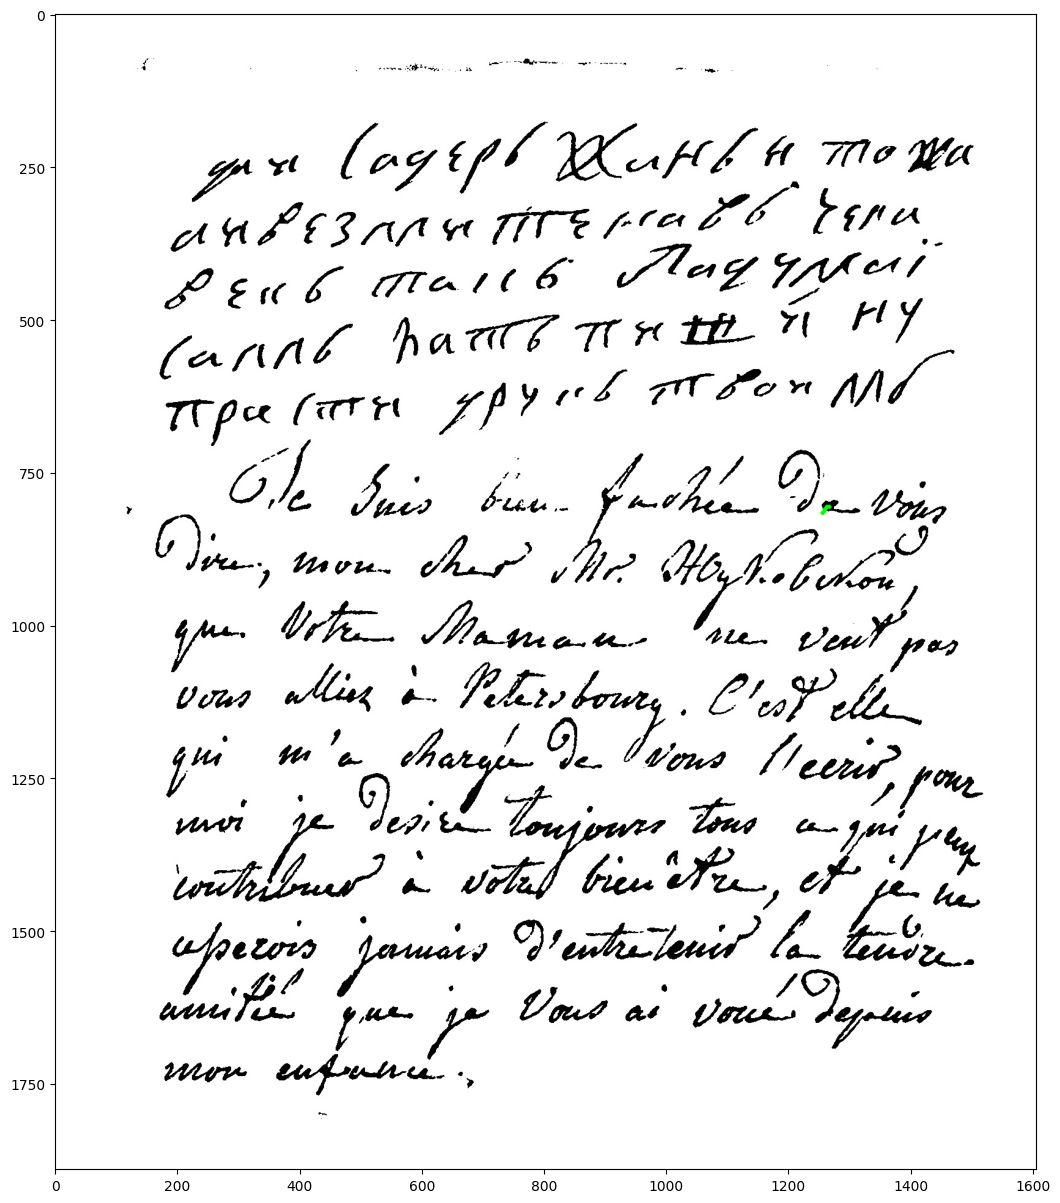

In [258]:
draw_stroke(image, strokes, 200)

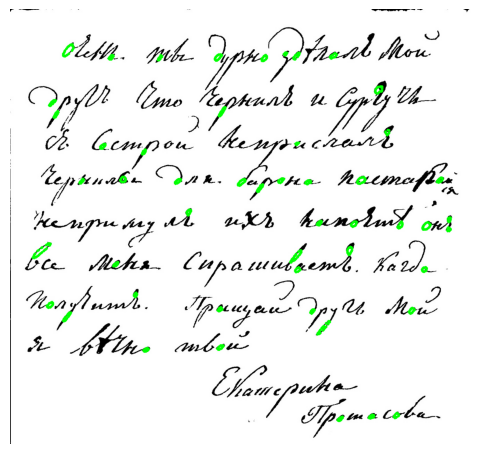

In [319]:
image = cv2.imread('почерки и штрихи/Почерк 1.jpg')
for i, stroke in enumerate(strokes):
    if stroke_info["stroke_types"][i] == 'Ring':
        # print('len ', len(stroke[0]), '  str ', stroke_info_old['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(5, 5))
plt.axis('off')
fig.tight_layout()
plt.imshow(image, cmap='gray')
fig.savefig("ringsall.pdf")

len  31   str  2
len  15   str  2
len  9   str  3
len  13   str  4
len  13   str  5
len  18   str  5
len  15   str  5
len  32   str  6
len  7   str  6
len  30   str  7
len  13   str  7
len  13   str  7
len  12   str  7
len  8   str  7
len  20   str  8
len  14   str  8
len  10   str  8
len  13   str  8
len  18   str  8
len  7   str  8
len  25   str  8
len  26   str  9
len  13   str  11
len  48   str  11
len  14   str  12
len  18   str  12
len  15   str  13
len  16   str  13
len  11   str  14
len  13   str  13
len  18   str  13
len  65   str  13
len  12   str  14


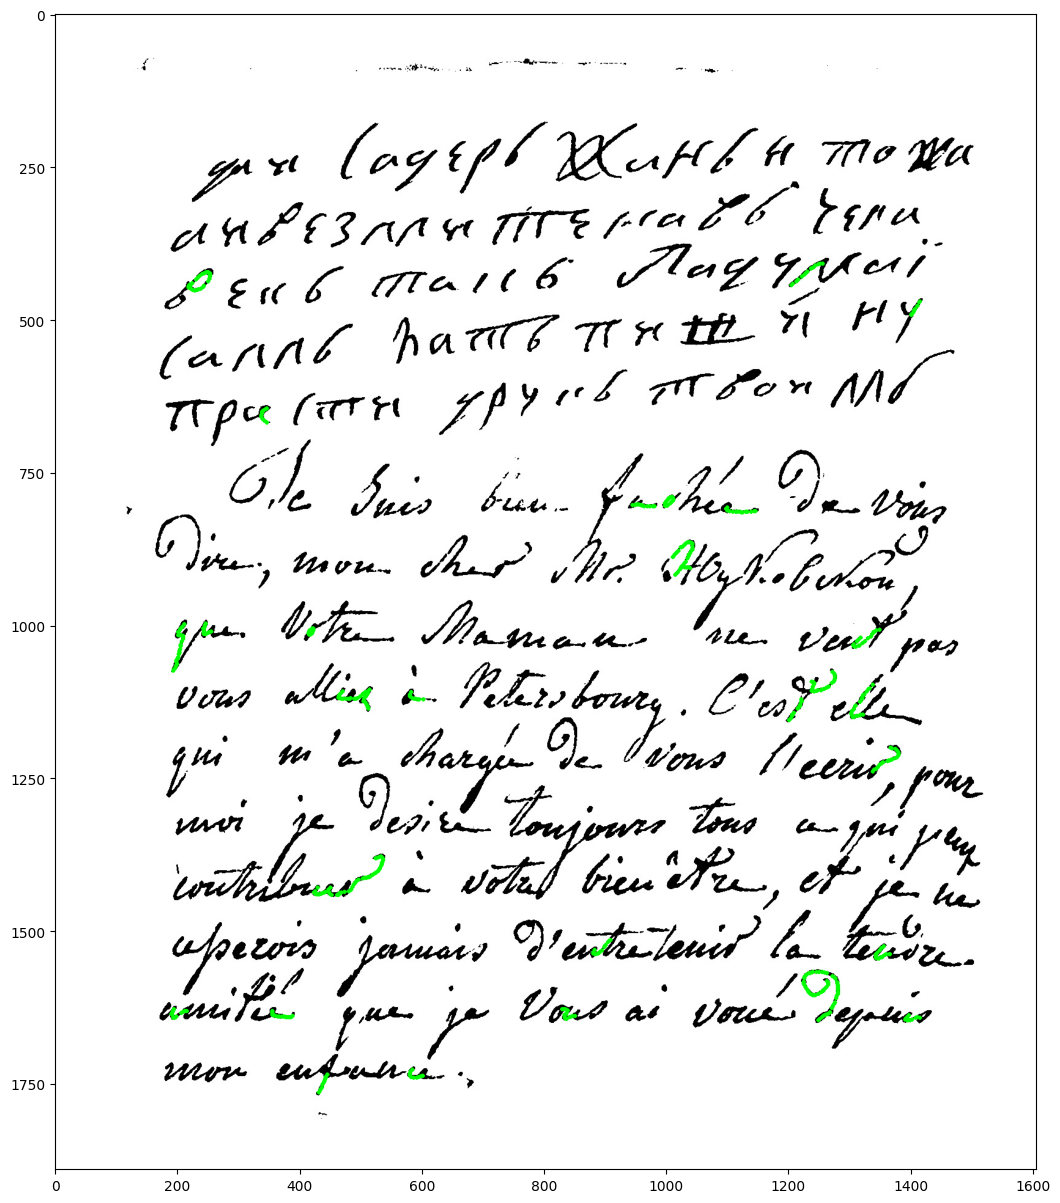

In [159]:
image = cv2.imread('test2-afterotsu.jpg')
for i, stroke in enumerate(strokes):
    if stroke_info['levels'][i] == 'свисающий':
        print('len ', len(stroke[0]), '  str ', stroke_info['n_string'][i])
        for point in zip(stroke[0], stroke[1]):
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')

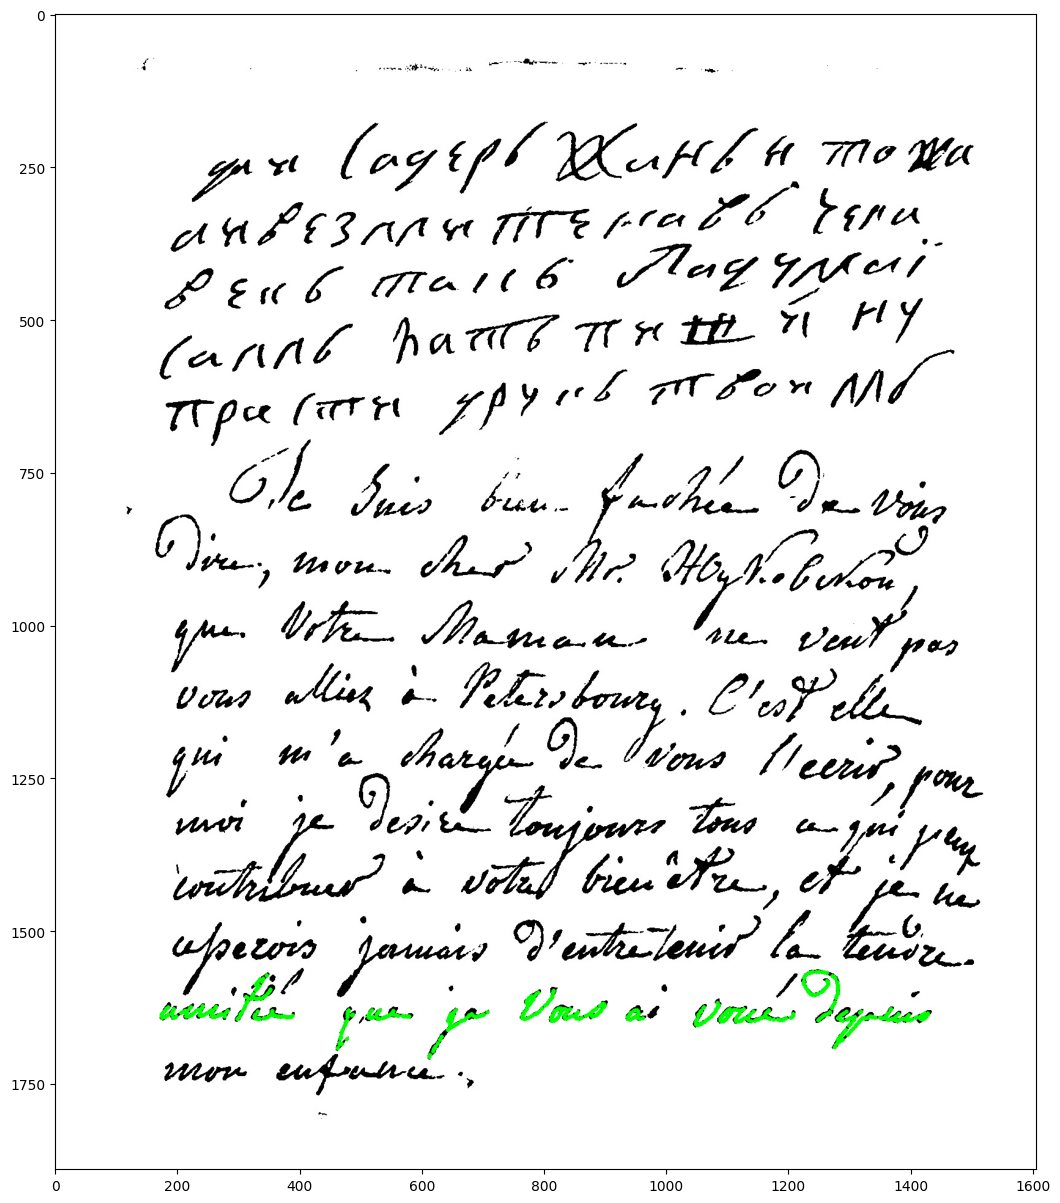

In [110]:
image = cv2.imread('test2-afterotsu.jpg')
for i, stroke in enumerate(strokes):
    for point in zip(stroke[0], stroke[1]):
        if int(stroke_info['n_string'][i]) == 13:
            image = cv2.circle(image, point, 2, (0, 255, 0), 2)
fig = plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')

In [ ]:
def get_angle(img):
    # сперва переведём изображение из RGB в чёрно серый
    # значения пикселей будут от 0 до 255
    img_gray = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
 
    # а теперь из серых тонов, сделаем изображение бинарным
    th_box = int(img_gray.shape[0] * 0.007) * 2 + 1
    img_bin_ = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, th_box, th_box)
 
    img_bin = img_bin_.copy()
    num_rows, num_cols = img_bin.shape[:2]
 
    best_zero, best_angle = None, 0
    # итеративно поворачиваем изображение на пол градуса
    for my_angle in range(-20, 21, 1):
        rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows /2 ), my_angle/2, 1)
        img_rotation = cv2.warpAffine(img_bin, rotation_matrix, (num_cols*2, num_rows*2),
                                      borderMode=cv2.BORDER_CONSTANT,
                                      borderValue=255)
 
        img_01 = np.where(img_rotation > 127, 0, 1)
        sum_y = np.sum(img_01, axis=1)
        th_ = int(img_bin_.shape[0]*0.005)
        sum_y = np.where(sum_y < th_, 0, sum_y)
 
        num_zeros = sum_y.shape[0] - np.count_nonzero(sum_y)
 
        if best_zero is None:
            best_zero = num_zeros
            best_angle = my_angle
 
        # лучший поворот запоминаем
        if num_zeros > best_zero:
            best_zero = num_zeros
            best_angle = my_angle
            cv2.imwrite('result.jpg', img_rotation)
 
    return best_angle * 0.5
 
 
img = cv2.imread('4.jpg')
best_angle = get_angle(img)
print(best_angle)

res = cv2.imread('result.jpg')
plt.imshow(res)
# cv2.waitKey()

In [228]:
x1, y1 = strokes[0][0], strokes[0][1]
x2, y2 = strokes[1][0], strokes[1][1]

In [229]:
def calculate_slope(x, y):
    mx = x - x.mean()
    my = y - y.mean()
    return sum(mx * my) / sum(mx**2)

def get_params(x, y):
    a = calculate_slope(x, y)
    b = y.mean() - a * x.mean()
    return a, b

In [230]:
a1, b1 = get_params(np.array(x1), np.array(y1))
a2, b2 = get_params(np.array(x2), np.array(y2))

In [231]:
x3, y3 = strokes[200][0], strokes[200][1]
a3, b3 = get_params(np.array(x3), np.array(y3))

In [232]:
a3, b3

(-0.9871323529411766, 2053.792279411765)

In [218]:
def get_incline_feature(strokes):
    inclines = []
    second = []
    for stroke in strokes:
        x = stroke[0]
        y = stroke[1]
        a, b = get_params(np.array(x), np.array(y))
        inclines.append(a)
        second.append(b)
    return inclines, second

In [234]:
incline_feature, bias = get_incline_feature(strokes)

In [245]:
alpha = np.sqrt(2) / 2

In [246]:
a1_new = (1+a1)/(1-a1)
b1_new = b1/(alpha*(1-a1))

In [247]:
a1, b1, a1_new, b1_new

(-0.6357924385223703,
 422.26855161954285,
 0.22264900662251652,
 365.06949084777426)

In [269]:
def incline_str(strokes): # функция для подсчёта наклона штрихов в строке
    incs, bias = get_incline_feature(strokes)
    print(incs)
    return np.nanmean(np.array(incs))

In [261]:
x3, y3 = strokes[1][0], strokes[1][1]
a3, b3 = get_params(np.array(x3), np.array(y3))
a3, b3

(-0.9575887322080968, 521.4970656791919)

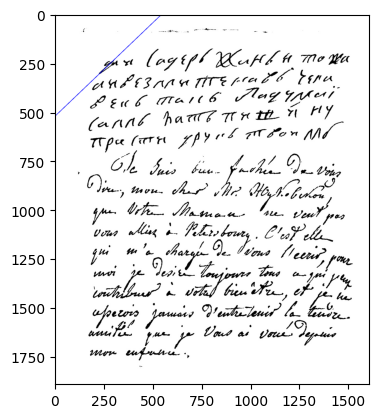

In [280]:
# Create a black image
im = cv2.imread('test2-afterotsu.jpg')
# im = np.zeros((image.shape[0],image.shape[1],3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
# im = cv2.line(im,(0,round(b1)),(round(-b1/a1),0),(255,0,0),5)
# im = cv2.line(im,(0,round(b2)),(round(-b2/a2),0),(0,255,0),2)
im = cv2.line(im,(0,round(b3)),(round(im.shape[0]),round(a3 * im.shape[0] + b3)),(0,0,255),2)
plt.imshow(im)

In [281]:
incline_feature = np.array(incline_feature)

In [238]:
del_ind = np.where(np.absolute(incline_feature) < 0.01)
for i in np.squeeze(del_ind):
    if 0 <= incline_feature[i] < 0.01:
        incline_feature[i] = 0.01
    else:
        incline_feature[i] = -0.01

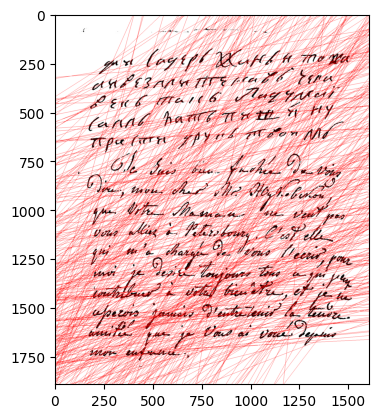

In [282]:
im = cv2.imread('test2-afterotsu.jpg')
for k, c, i in zip(incline_feature, bias, range(len(bias))):
    im = cv2.line(im,(0,round(c)),(round(-c/k),0),(255,0,0),1)
# im = cv2.line(im,(0,round(b1)),(round(-b1/a1),0),(255,0,0),5)
# im = cv2.line(im,(0,round(b2)),(round(-b2/a2),0),(0,255,0),2)
# im = cv2.line(im,(0,round(b3)),(round(im.shape[0]),round(a3 * im.shape[0] + b3)),(0,0,255),2)
plt.imshow(im)

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(10, 6))

for i in range(len(strokes))

for i in range(len(unique)):
    idx = np.squeeze(np.where(n_lines == i))
    axes[i // 3][i % 3].hist(curvature_feature[idx], bins=10, color='orange')
    axes[i // 3][i % 3].grid(True)
    axes[i // 3][i % 3].set_title(f'Строка №{i}')

fig.suptitle('Распределение штрихов по кривизне для строк', fontsize=30, y=1)
fig.tight_layout()
plt.show()

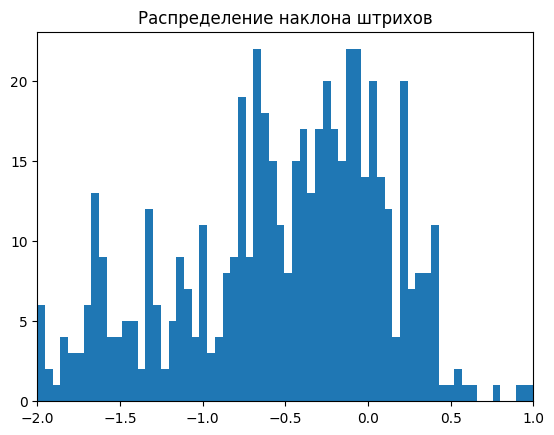

In [243]:
plt.hist(incline_feature, bins=300)
plt.title('Распределение наклона штрихов')
plt.xlim (-2, 1)
plt.show()

In [244]:
incline_feature

array([-0.63579244, -0.95758873, -0.68233795,  1.0625    ,  0.93867925,
       -0.56740443, -1.61841998, -0.37276109, -0.15519674, -1.15298503,
       -0.72126437, -1.64011556, -1.56111756, -1.2910628 , -1.119706  ,
        0.39093555, -0.71085653, -0.59508621, -0.74070489,  0.95929641,
       -0.22227671, -6.4       , -1.62535063,  0.23118024, -0.99756502,
       -1.02474108, -1.10323552, -1.34060317,  0.11914557, -1.12317666,
        0.17165375, -0.07909968, -0.60313807, -0.5840249 , -0.78024623,
       -0.66982409,  0.26315789, -0.83677686, -0.75350808, -0.46983403,
       -2.1396648 , -2.25510204, -0.53374039,  0.76758148, -0.50991626,
       -3.74489796, -0.61837811, -1.18548661, -0.65848525, -1.46806837,
       -1.14592422, -0.3632865 , -0.94103774, -1.97306792,  1.57049608,
       -0.12928907, -1.06818182, -1.87905159, -0.13558146, -1.80821021,
       -1.84418146, -0.20072391, -1.13295217, -0.21969465, -1.03753427,
       -0.47109067, -0.85262791, -2.44804027, -1.71165949, -0.27

In [194]:
im2 = cv2.imread('test2-afterotsu.jpg')
strokes2 = parser('test2-afterotsu.txt', im2)

In [195]:
len(strokes2)

644

In [196]:
count = 0
for stroke in strokes2:
    if len(stroke[0]) < 5:
        strokes2.remove(stroke)
        count += 1
count, len(strokes2)

(32, 612)

In [317]:
incline_feature2, bias2 = get_incline_feature(strokes2)

In [318]:
incline_feature2 = np.array(incline_feature2)
del_ind = np.where(np.absolute(incline_feature2) < 0.01)
#incline_feature2 = np.delete(incline_feature2, del_ind)

In [320]:
for i in np.squeeze(del_ind):
    if 0 <= incline_feature2[i] < 0.01:
        incline_feature2[i] = 0.01
    else:
        incline_feature2[i] = -0.01

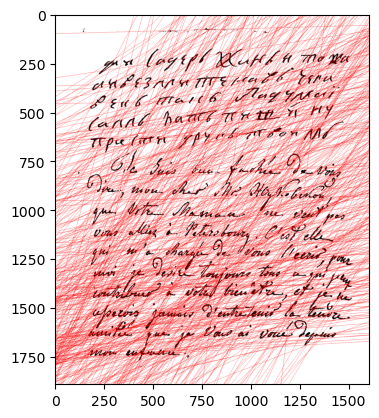

In [321]:
im2 = cv2.imread('test2-afterotsu.jpg')
for k, c, i in zip(incline_feature2, bias2, range(len(bias2))):
    im2 = cv2.line(im2,(0,round(c)),(round(-c/k),0),(255,0,0),1)
plt.imshow(im2)

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i in range(len(unique)):
    idx = np.squeeze(np.where(n_lines == i))
    axes[i // 3][i % 3].hist(curvature_feature[idx], bins=10, color='orange')
    axes[i // 3][i % 3].grid(True)
    axes[i // 3][i % 3].set_title(f'Строка №{i}')

fig.suptitle('Распределение штрихов по кривизне для строк', fontsize=30, y=1)
fig.tight_layout()
plt.show()

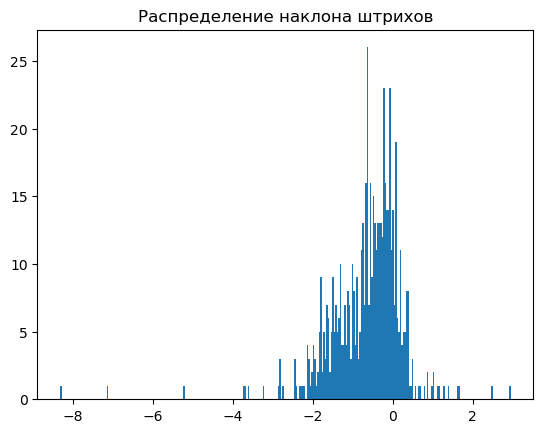

In [325]:
plt.hist(incline_feature2, bins=300)
plt.title('Распределение наклона штрихов')
plt.show()

In [244]:
ind_del1 = np.where(incline_feature < -2)
ind_del2 = np.where(incline_feature > 0.5)
ind_del = np.hstack((ind_del1, ind_del2))

In [246]:
incline_feature = np.delete(incline_feature, ind_del)

In [247]:
np.mean(incline_feature)

-0.6641296980534155

In [248]:
ind_del1 = np.where(incline_feature2 < -2)
ind_del2 = np.where(incline_feature2 > 0.5)
ind_del = np.hstack((ind_del1, ind_del2))
incline_feature2 = np.delete(incline_feature2, ind_del)

In [249]:
np.mean(incline_feature2)

-0.587734857982786

In [224]:
img = cv2.imread('test2-afterotsu.jpg')
img_copy = img.copy()
gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

Хотим ещё признак - кривизна?

In [225]:
_, bin_img = cv2.threshold(gray_img, 127.5, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [252]:
def dist(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

In [255]:
def get_curvature_feature(strokes):
    curvatures = []
    for stroke in strokes:
        points = list(zip(stroke[0], stroke[1]))
        curv = 0
        for i in range(1, len(points) - 1):
            curv += abs(dist(points[i-1], points[i]) + dist(points[i], points[i+1]) - dist(points[i-1], points[i+1]))
        curvatures.append(curv)
    return curvatures

In [258]:
curvature_feature = get_curvature_feature(strokes2)

In [268]:
curvature_feature[192]

9.28499948432836

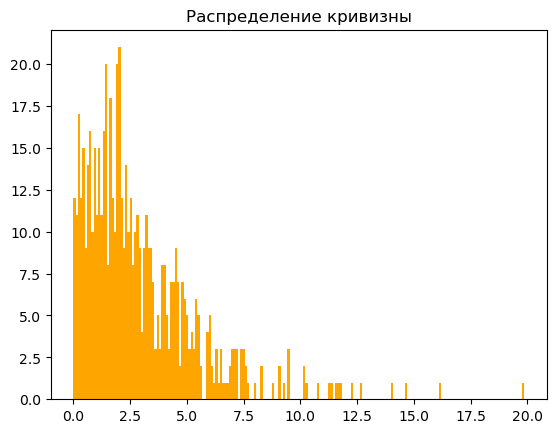

In [262]:
plt.hist(curvature_feature, bins=200, color='orange')
plt.title('Распределение кривизны')
plt.show()

In [278]:
img = cv2.imread('test2-afterotsu.jpg')

In [266]:
len(strokes2)

612

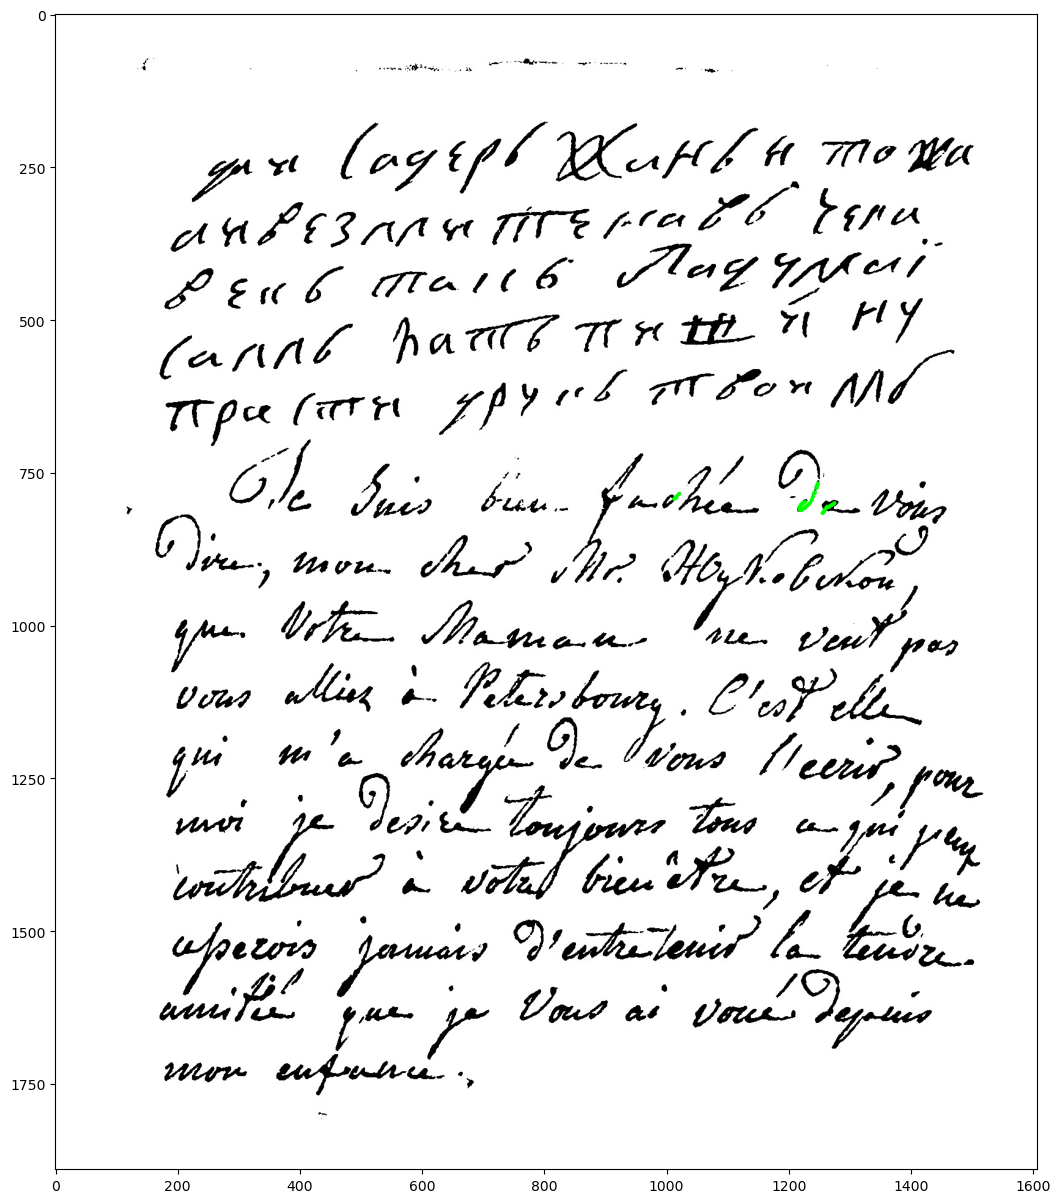

In [282]:
draw_stroke(img, strokes2, 199)

In [285]:
def get_extrems(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_img = np.array(gray_img)
    _, bin_img = cv2.threshold(gray_img, 127.5, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    ones_img = np.sum(bin_img, axis=1)
    curr = 0
    prev = 0
    extrems = []
    while curr < len(ones_img):
        while curr < len(ones_img) and ones_img[curr] < 210:
            curr += 1
        if curr < len(ones_img):
            mx = curr + np.argmax(ones_img[curr:curr+55])
            extrems.append(mx)
            curr += 55
    return extrems

In [286]:
img = cv2.imread('test2-afterotsu.jpg')
extrems = get_extrems(img)

In [283]:
def division_strokes(strokes, extrems):
    def detect_confines_lines(extremes):
        line_confines = []
        a = extremes[0] - 80
        b = extremes[0] + round((extremes[1] - extremes[0])/2)
        line_confines.append((a,b))
        for i in range(1, len(extremes)-1):
            a = extremes[i] - round((extremes[i] - extremes[i-1])/2)
            b = extremes[i] + round((extremes[i+1] - extremes[i])/2)
            line_confines.append((a,b))
        a = extremes[-1] - round((extremes[-1] - extremes[-2])/2)
        b = extremes[-1] + 80
        line_confines.append((a,b))
        return line_confines

    confines_for_strokes = detect_confines_lines(extrems)
    res = []
    for stroke in strokes: # для каждого штриха
        n_lines = []
        for p in stroke[1]: # для каждой точки в штрихе
            j = 0
            while j+1 < len(confines_for_strokes) and p > confines_for_strokes[j+1][0]:
                j += 1
            n_lines.append(j)
        most_common_line = np.argmax(np.bincount(np.array(n_lines)))
        res.append(most_common_line)
    return res    

In [287]:
n_lines = np.array(division_strokes(strokes2, extrems))
unique, counts = np.unique(n_lines, return_counts=True)

In [300]:
curvature_feature = np.array(curvature_feature)

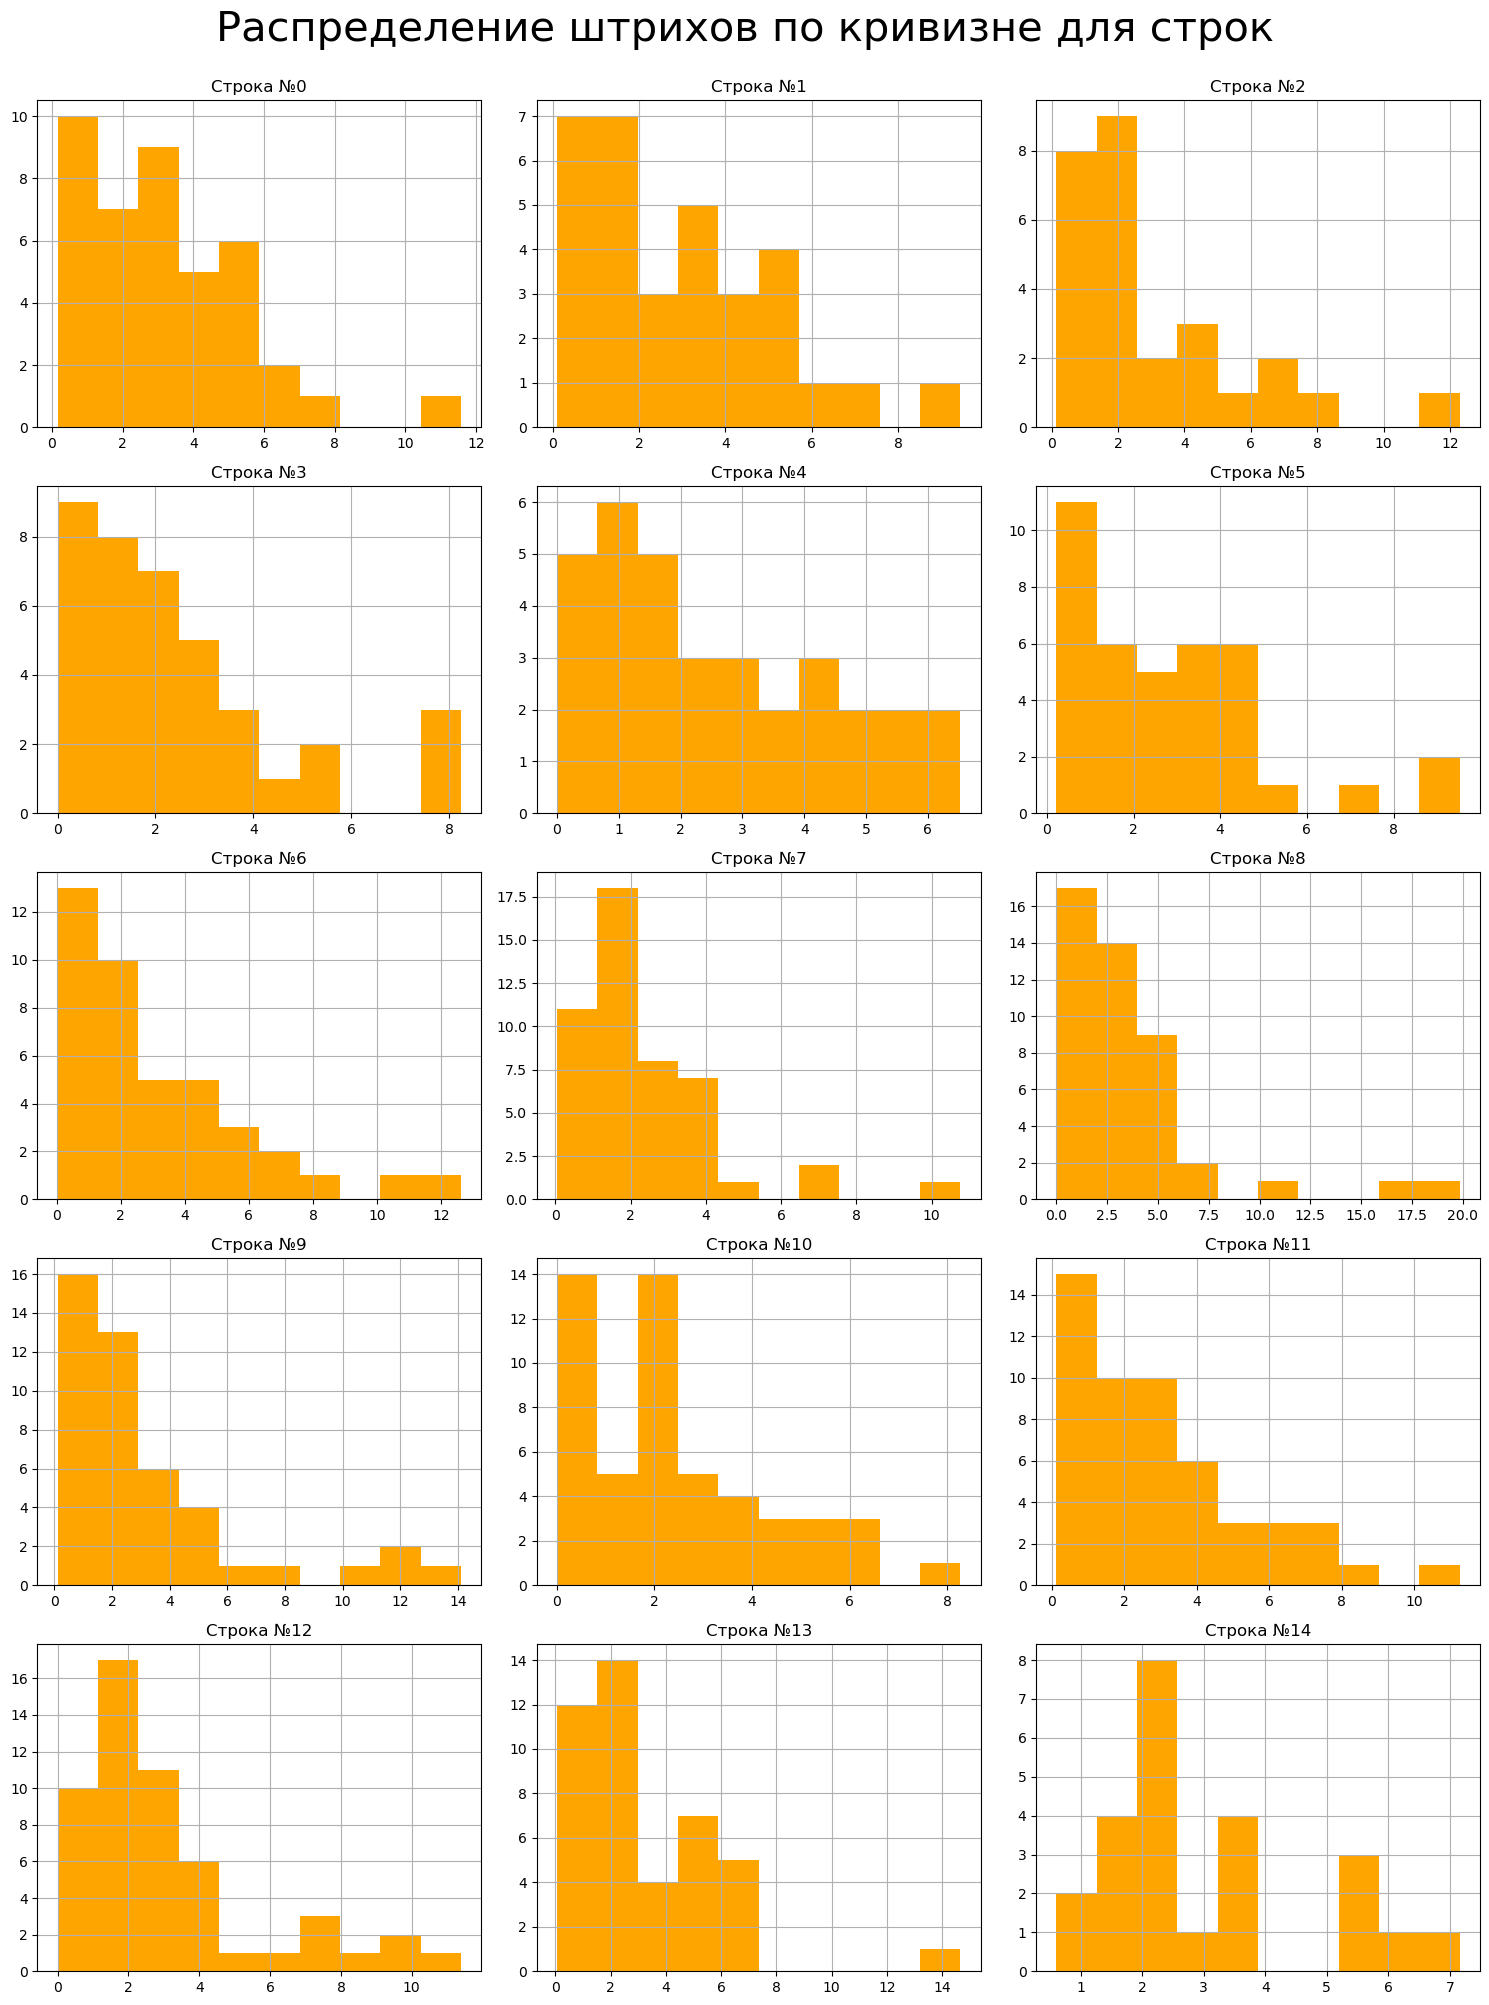

In [312]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i in range(len(unique)):
    idx = np.squeeze(np.where(n_lines == i))
    axes[i // 3][i % 3].hist(curvature_feature[idx], bins=10, color='orange')
    axes[i // 3][i % 3].grid(True)
    axes[i // 3][i % 3].set_title(f'Строка №{i}')

fig.suptitle('Распределение штрихов по кривизне для строк', fontsize=30, y=1)
fig.tight_layout()
plt.show()

In [329]:
ind_del1 = np.where(incline_feature2 < -2)
ind_del2 = np.where(incline_feature2 > 0.5)
ind_del = np.hstack((ind_del1, ind_del2))
incline_feature2_cpy = np.delete(incline_feature2, ind_del)
n_lines_cpy = np.delete(n_lines, ind_del)

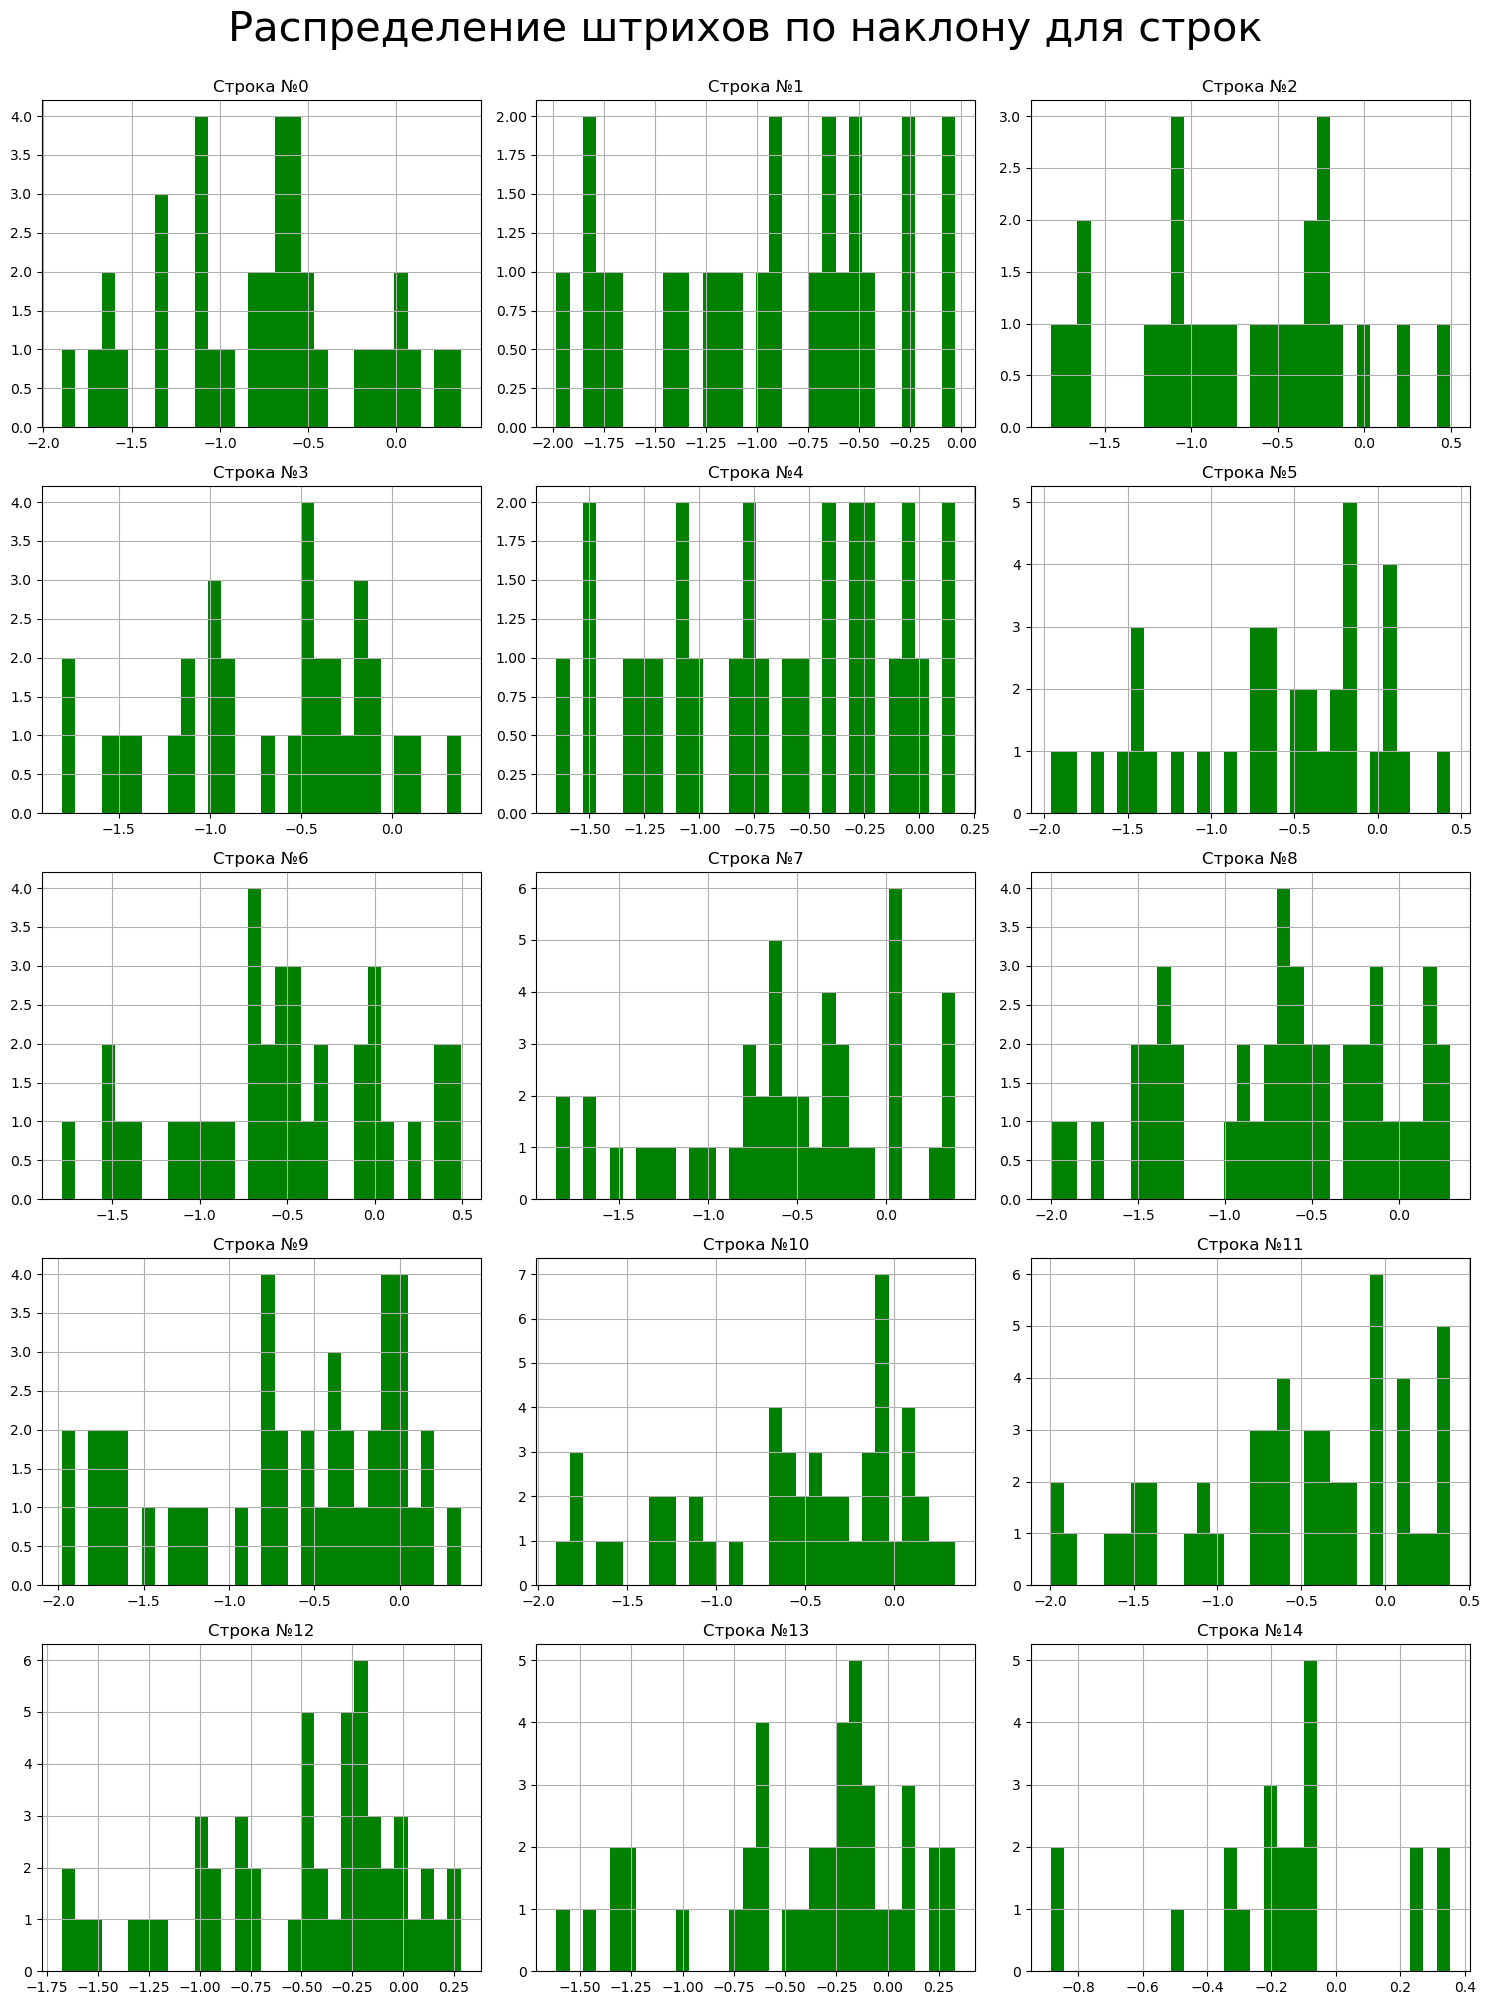

In [330]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

for i in range(len(unique)):
    idx = np.squeeze(np.where(n_lines_cpy == i))
    axes[i // 3][i % 3].hist(incline_feature2_cpy[idx], bins=30, color='g')
    axes[i // 3][i % 3].grid(True)
    axes[i // 3][i % 3].set_title(f'Строка №{i}')

fig.suptitle('Распределение штрихов по наклону для строк', fontsize=30, y=1)
fig.tight_layout()
plt.show()